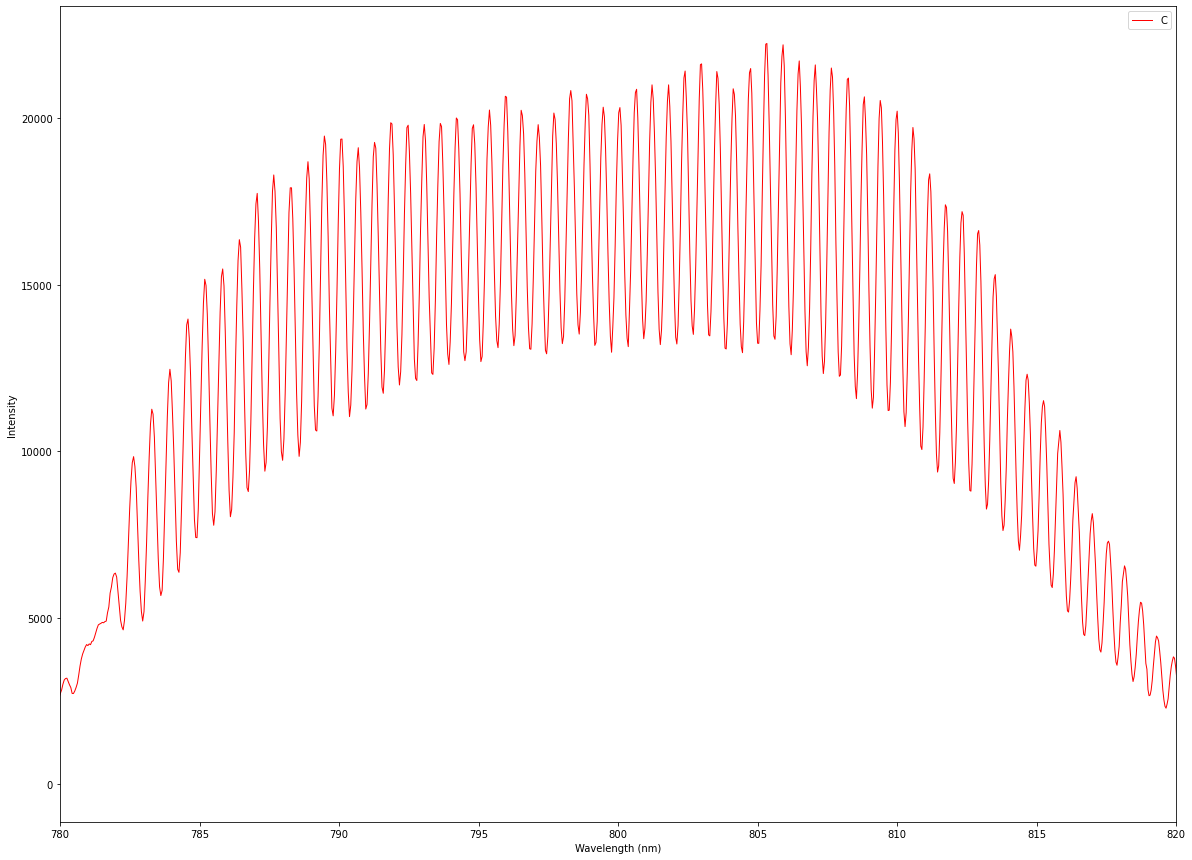

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
#plotting clear-path data without conversion of wavelength into frequency
fig, ax = plt.subplots(figsize=(20, 15))
df=pd.read_csv("Clear_Path_300ms_delay01_subt2.csv",sep="	")
interp = interpolate.interp1d(df["Wavelength(nm)"],df["Intensity"],kind="cubic")
xnew = df["Wavelength(nm)"]
ynew = interp(xnew)
plt.plot(xnew,ynew, color = "r", linewidth = 1)
plt.xlim([780, 820])
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity")
plt.legend("Clear Path")

In [156]:
c=3e+8;
#creating equally spaced frequency column for discrete inverse fourier transform
freq_array=(c*1e+9)/df["Wavelength(nm)"];
df["Frequency (s^(-1))"] = np.linspace(freq_array[0],freq_array[2067], 2068, endpoint=True)
from scipy.fft import fft, ifft
#from frequency domain to time domain
y=ifft(np.array(df["Intensity"]))
#calculating the phase shift caused by dispersion
dispersion_phase=np.angle(y,deg=False)
df["dispersion_phase"]=dispersion_phase
df["corrected_phase"]=2*np.pi*df["Frequency (s^(-1))"]-df["dispersion_phase"]
df["pseudo_Frequency (s^(-1))"]=df["corrected_phase"]/(2*np.pi)
df["eq_p_Freq"] = np.linspace(df["pseudo_Frequency (s^(-1))"][0], df["pseudo_Frequency (s^(-1))"][2067], 2068)
df


,Wavelength(nm),Intensity,Frequency (s^(-1)),dispersion_phase,corrected_phase,pseudo_Frequency (s^(-1)),eq_p_Freq
0,772.673,58.62,3.882626e+14,-0.000000,2.439526e+15,3.882626e+14,3.882626e+14
1,772.721,-12.38,3.882450e+14,1.869168,2.439416e+15,3.882450e+14,3.882450e+14
2,772.770,2.52,3.882275e+14,-2.620238,2.439305e+15,3.882275e+14,3.882275e+14
3,772.819,2.62,3.882100e+14,2.413231,2.439195e+15,3.882100e+14,3.882100e+14
4,772.867,110.22,3.881925e+14,-2.209744,2.439085e+15,3.881925e+14,3.881925e+14
...,...,...,...,...,...,...,...
2063,852.043,101.52,3.521183e+14,0.729611,2.212425e+15,3.521183e+14,3.521183e+14
2064,852.071,-1.68,3.521008e+14,2.209744,2.212314e+15,3.521008e+14,3.521008e+14
2065,852.100,-1.28,3.520833e+14,-2.413231,2.212204e+15,3.520833e+14,3.520833e+14
2066,852.128,-0.38,3.520657e+14,2.620238,2.212094e+15,3.520657e+14,3.520657e+14


In [165]:
#this is the code to check for the even spacing
a=np.linspace(2.3,7.8,5)
all(np.diff(a)==np.diff(a)[0])

True